In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  datetime import datetime
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)   
import traceback
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Users\\kelly\\Desktop\\df_0416.txt',sep=',') 
df.groupby(df.loanstyle).size()

loanstyle
绿卡30天2期     490
绿卡3月3期     1148
dtype: int64

In [3]:
def default_rate_cum(df,s991_cut,default_label):
    df_cut_off = df.loc[df.s991_all_c >= s991_cut].loc[:,['loanid',default_label]]
    df_ovr = df_cut_off.drop_duplicates()
    ovr_target = df_ovr[~df_ovr[default_label].isnull()]
    # print(ovr_target)
    if ovr_target.empty:
        # print(default_label, 'no loan mature yet')
        return None
    ovr_default_rate = round(np.mean(ovr_target[default_label].tolist()),4)
    ovr_pct = round(len(df_cut_off)/len(df),4)
    ovr_default_cnt = len(ovr_target)
    return s991_cut,len(df_ovr),ovr_pct,default_label,ovr_default_cnt,ovr_default_rate

def valuation(df):
    valuation =pd.DataFrame(columns=('f051_cut','s991_cut','over_cnt','over_pct','default_label','default_cnt','default_rate'))
    default_label = ['default_1_0','default_1_3','default_1_10']

    for i in sorted(df.f051.drop_duplicates().tolist()):
        for j in range(700,950):
            for k in default_label:
                dfr = default_rate_cum(df[df.f051 == i],j,k)
                # print(dfr)
                try:
                    valuation = valuation.append({"f051_cut":i,"s991_cut":dfr[0],"over_cnt":dfr[1],"over_pct":dfr[2],"default_label":dfr[3],"default_cnt":dfr[4],"default_rate":dfr[5]},ignore_index=True)
                except:
                    continue
    return valuation


Text(0.5, 1.0, 'gc_30days_2q correlation:0.0886')

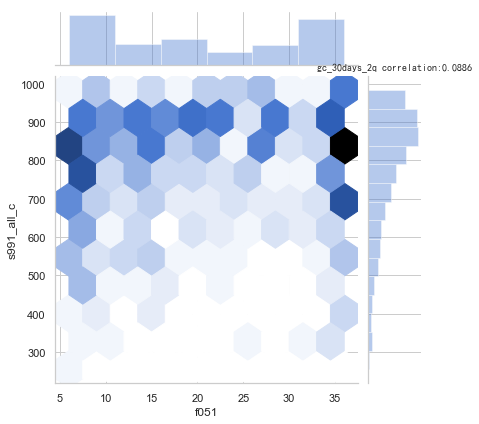

In [4]:
df2 = df[df.loanstyle == '绿卡30天2期']
sns.jointplot(x='f051', y='s991_all_c', data=df2, kind='hex', size=(6))
plt.title('gc_30days_2q correlation:' + str(round(df2.s991_all_c.corr(df2.f051),4)), fontproperties='SimHei')

Text(0.5, 1.0, 'gc_3m3q correlation:0.2393')

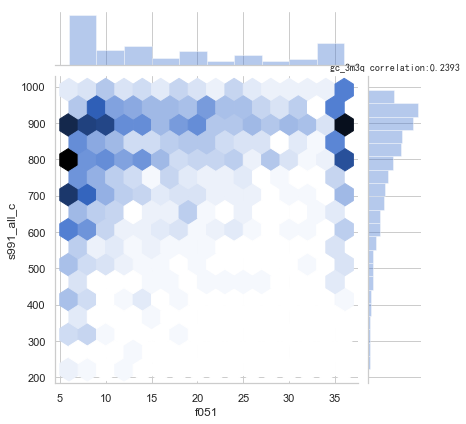

In [5]:
df3 = df[df.loanstyle == '绿卡3月3期']
sns.jointplot(x='f051', y='s991_all_c', data=df3, kind='hex', size=(6))
plt.title('gc_3m3q correlation:' + str(round(df3.s991_all_c.corr(df3.f051),4)), fontproperties='SimHei')

In [6]:
v2 = valuation(df2)
v3 = valuation(df3)

In [7]:
v2.to_csv('C:\\Users\\kelly\\Desktop\\v2_0416.txt',index=False)
v3.to_csv('C:\\Users\\kelly\\Desktop\\v3_0416.txt',index=False)

In [8]:
v = valuation(df)
v.to_csv('C:\\Users\\kelly\\Desktop\\v_0416.txt',index=False)

In [22]:
cut1 = v2[(v2.default_label == 'default_1_0')&(v2.default_rate <= 0.3)]
cut2 = cut1.groupby('f051_cut')['s991_cut'].min().sort_index()
cut2.reset_index(name='s991_cut')
cut2 = pd.DataFrame(cut2)
cut1
# cut = pd.merge(cut2,cut1,on = ('f051_cut','s991_cut'),how = 'left')  
# print("default_1_0 <= 0.3 : ")
# print(cut.loc[:,['f051_cut','s991_cut','over_cnt','over_pct','default_cnt','default_rate']])

,f051_cut,s991_cut,over_cnt,over_pct,default_label,default_cnt,default_rate
0,6,700,43,0.6719,default_1_0,15,0.2667
1,6,701,43,0.6719,default_1_0,15,0.2667
2,6,702,43,0.6719,default_1_0,15,0.2667
3,6,703,43,0.6719,default_1_0,15,0.2667
4,6,704,43,0.6719,default_1_0,15,0.2667
5,6,705,43,0.6719,default_1_0,15,0.2667
6,6,706,43,0.6719,default_1_0,15,0.2667
7,6,707,43,0.6719,default_1_0,15,0.2667
8,6,708,43,0.6719,default_1_0,15,0.2667
9,6,709,43,0.6719,default_1_0,15,0.2667


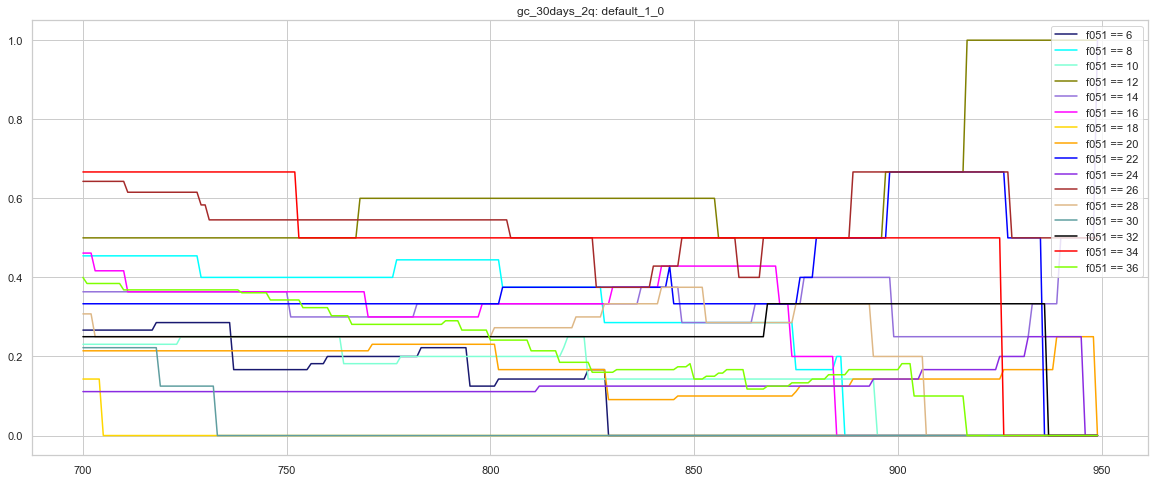

In [21]:
fig = plt.figure(facecolor='white',figsize=(20,8))
ax = fig.add_subplot(1,1,1)
for i,j in zip(sorted(v2.f051_cut.drop_duplicates().tolist()),\
           ['midnightblue', 'aqua','aquamarine','olive','mediumpurple','magenta','gold','orange','blue','blueviolet','brown','burlywood','cadetblue','black','red','chartreuse']):  
    # print(i,j)
    fg = v2[(v2.f051_cut == i) & (v2.default_label == 'default_1_0')]
    ax.plot(fg.s991_cut,fg.default_rate,color = j,label = 'f051 == '+ str(i))

ax.set_title(label='gc_30days_2q: default_1_0', loc='center')
ax.legend(loc = 1)

In [14]:
df3 = df[df.loanstyle == '绿卡3月3期']
df5 = df[df.loanstyle == '绿卡分期5月']

v3 = valuation(df3)
v5 = valuation(df5)

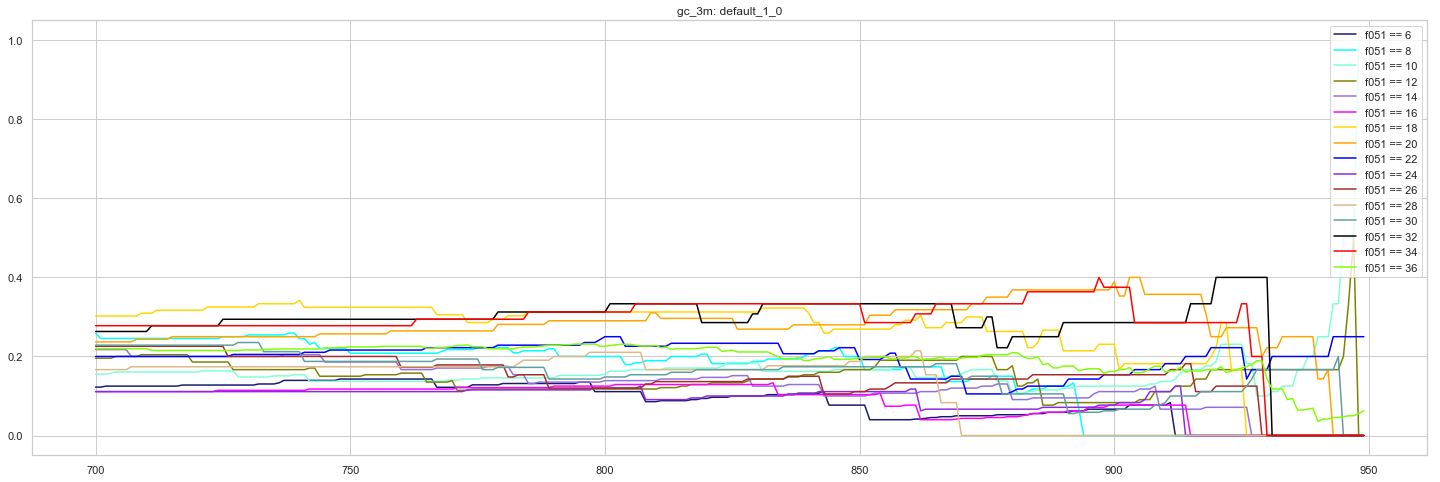

In [16]:
fig = plt.figure(facecolor='white',figsize=(25,8))
ax = fig.add_subplot(1,1,1)
for i,j in zip(sorted(v3.f051_cut.drop_duplicates().tolist()),\
           ['midnightblue', 'aqua','aquamarine','olive','mediumpurple','magenta','gold','orange','blue','blueviolet','brown','burlywood','cadetblue','black','red','chartreuse']):  
    # print(i,j)
    fg = v3[(v3.f051_cut == i) & (v3.default_label == 'default_1_0')]
    ax.plot(fg.s991_cut,fg.default_rate,color = j,label = 'f051 == '+ str(i))

ax.set_title(label='gc_3m: default_1_0', loc='center')
ax.legend(loc = 1)

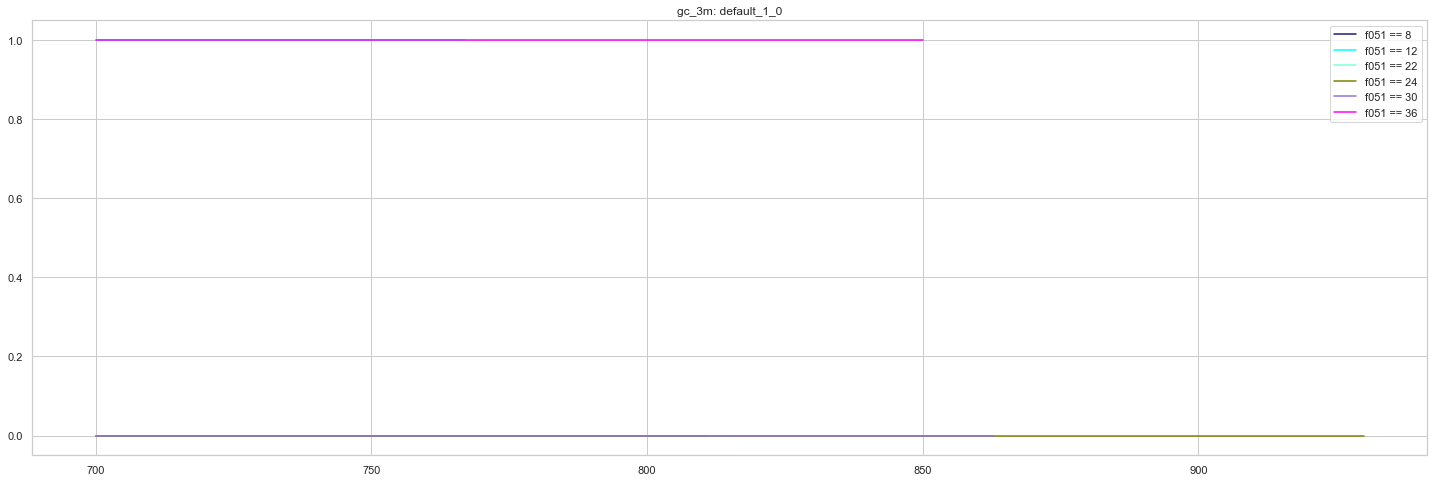

In [17]:
fig = plt.figure(facecolor='white',figsize=(25,8))
ax = fig.add_subplot(1,1,1)
for i,j in zip(sorted(v5.f051_cut.drop_duplicates().tolist()),\
           ['midnightblue', 'aqua','aquamarine','olive','mediumpurple','magenta','gold','orange','blue','blueviolet','brown','burlywood','cadetblue','black','red','chartreuse']):  
    # print(i,j)
    fg = v5[(v5.f051_cut == i) & (v5.default_label == 'default_1_0')]
    ax.plot(fg.s991_cut,fg.default_rate,color = j,label = 'f051 == '+ str(i))

ax.set_title(label='gc_5m: default_1_0', loc='center')
ax.legend(loc = 1)